In [75]:
import pandas as pd


In [76]:
import matplotlib.pyplot as plt

In [77]:
import seaborn as sns


In [78]:
import numpy as np

In [79]:
com=pd.read_csv("/Users/da-m1-09/Downloads/Final_Mar.csv")

In [80]:
com


,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,year,month,day,selling_price
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020/03/10,108.0,112.0,3236.0,29.0,348.0,0.0,9.30,2020.0,3.0,10.0,111.59
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020/09/09,150.0,170.0,51710.0,332.0,6075.6,822.0,8.51,2020.0,9.0,9.0,155.75
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020/05/05,70.0,80.0,4860.0,66.0,1320.0,50.0,3.68,2020.0,5.0,5.0,73.64
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020/01/20,60.0,60.0,600.0,10.0,90.0,0.0,6.67,2020.0,1.0,20.0,60.00
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020/07/14,40.0,45.0,41530.0,927.0,9270.0,393.0,4.48,2020.0,7.0,14.0,44.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64371,TRANSVAAL,AG100,1M,10.0,ONIONS MILD,2020/05/18,70.0,75.0,19695.0,281.0,2810.0,3583.0,7.01,2020.0,5.0,18.0,70.09
64372,IMPORTS - OUTSIDE RSA,BC180,X,18.0,BANANA,2020/02/05,160.0,220.0,13560.0,72.0,1296.0,887.0,10.46,2020.0,2.0,5.0,188.33
64373,TRANSVAAL,TS035,1M,3.5,TOMATOES-LONG LIFE,2020/08/20,20.0,20.0,6000.0,300.0,1050.0,900.0,5.71,2020.0,8.0,20.0,20.00
64374,NATAL,BJ100,2M,10.0,LEMON,2020/08/18,50.0,80.0,16730.0,277.0,2770.0,372.0,6.04,2020.0,8.0,18.0,60.40


In [81]:
com.dropna(inplace=True)


In [82]:
com.isnull().sum()

Province            0
Container           0
Size_Grade          0
Weight_Kg           0
Commodities         0
Date                0
Low_Price           0
High_Price          0
Sales_Total         0
Total_Qty_Sold      0
Total_Kg_Sold       0
Stock_On_Hand       0
avg_price_per_kg    0
year                0
month               0
day                 0
selling_price       0
dtype: int64

FOCUSING ON ONION MILD(Predicting the average price per kg)

In [83]:
onion=com[com['Commodities'] =='ONIONS MILD']
onion

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,year,month,day,selling_price
41,TRANSVAAL,AG100,1M,10.0,ONIONS MILD,2020/10/03,30.0,58.0,117927.0,2560.0,25600.0,7639.0,4.61,2020.0,10.0,3.0,46.07
56,TRANSVAAL,AI200,1M,20.0,ONIONS MILD,2020/08/14,192.0,192.0,8800.0,10.0,200.0,135.0,44.00,2020.0,8.0,14.0,880.00
87,NATAL,AG100,2M,10.0,ONIONS MILD,2020/02/03,10.0,15.0,95.0,9.0,90.0,61.0,1.06,2020.0,2.0,3.0,10.56
112,TRANSVAAL,AG100,1S,10.0,ONIONS MILD,2020/09/02,25.0,40.0,38300.0,1326.0,13260.0,736.0,2.89,2020.0,9.0,2.0,28.88
146,NORTHERN CAPE,AG100,1L,10.0,ONIONS MILD,2020/01/10,54.0,62.0,16214.0,281.0,2810.0,1665.0,5.77,2020.0,1.0,10.0,57.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64319,NORTHERN CAPE,AF070,1M,7.0,ONIONS MILD,2020/01/28,28.0,35.0,97840.0,3353.0,23471.0,3278.0,4.17,2020.0,1.0,28.0,29.18
64330,NORTH WEST,AG100,1M,10.0,ONIONS MILD,2020/06/17,50.0,50.0,200.0,4.0,40.0,0.0,5.00,2020.0,6.0,17.0,50.00
64354,TRANSVAAL,AG100,1S,10.0,ONIONS MILD,2020/05/27,58.0,58.0,6380.0,110.0,1100.0,309.0,5.80,2020.0,5.0,27.0,58.00
64357,NORTHERN CAPE,AF070,1Z,7.0,ONIONS MILD,2020/03/30,30.0,30.0,3900.0,130.0,910.0,550.0,4.29,2020.0,3.0,30.0,30.00


In [84]:
com.describe()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,year,month,day,selling_price
count,64368.000000,64368.000000,64368.000000,6.436800e+04,64368.000000,64368.000000,64368.000000,64368.000000,64368.000000,64368.000000,64368.000000,64368.000000
mean,12.775983,75.649130,89.606784,1.939782e+04,446.159847,3337.055990,477.677107,10.465372,2019.967453,5.130686,15.663000,82.109891
std,35.912807,159.508488,172.225175,4.442383e+04,1184.232900,7682.682767,1453.963990,26.126632,0.177450,2.819125,8.633286,166.351545
min,0.120000,1.000000,1.000000,-5.770000e+04,-595.000000,-5040.000000,-512.000000,-78.670000,2019.000000,1.000000,1.000000,-944.000000
25%,7.000000,30.000000,35.000000,1.155000e+03,20.000000,175.000000,0.000000,4.020000,2020.000000,3.000000,9.000000,31.280000
50%,10.000000,46.000000,55.000000,5.400000e+03,107.000000,940.000000,76.000000,6.000000,2020.000000,5.000000,15.000000,50.000000
75%,11.000000,80.000000,100.000000,1.877400e+04,390.000000,3253.000000,381.000000,8.670000,2020.000000,7.000000,23.000000,90.670000
max,500.000000,4400.000000,4400.000000,1.134701e+06,39453.000000,192230.000000,93193.000000,1250.000000,2020.000000,12.000000,31.000000,4400.000000


In [85]:
com.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64368 entries, 0 to 64375
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province          64368 non-null  object 
 1   Container         64368 non-null  object 
 2   Size_Grade        64368 non-null  object 
 3   Weight_Kg         64368 non-null  float64
 4   Commodities       64368 non-null  object 
 5   Date              64368 non-null  object 
 6   Low_Price         64368 non-null  float64
 7   High_Price        64368 non-null  float64
 8   Sales_Total       64368 non-null  float64
 9   Total_Qty_Sold    64368 non-null  float64
 10  Total_Kg_Sold     64368 non-null  float64
 11  Stock_On_Hand     64368 non-null  float64
 12  avg_price_per_kg  64368 non-null  float64
 13  year              64368 non-null  float64
 14  month             64368 non-null  float64
 15  day               64368 non-null  float64
 16  selling_price     64368 non-null  float64
dty

In [86]:
com.sort_values('Commodities', ascending=False).head(5)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,year,month,day,selling_price
23397,TRANSVAAL,HJ100,L,10.0,WATERMELON,2020/03/12,20.0,40.0,11620.0,457.0,4570.0,2425.0,2.54,2020.0,3.0,12.0,25.43
30492,NATAL,HL120,X,12.0,WATERMELON,2020/01/21,50.0,50.0,6500.0,130.0,1560.0,1116.0,4.17,2020.0,1.0,21.0,50.00
21754,TRANSVAAL,HH080,M,8.0,WATERMELON,2020/02/27,20.0,25.0,12250.0,610.0,4880.0,1273.0,2.51,2020.0,2.0,27.0,20.08
8550,TRANSVAAL,HJ100,L,10.0,WATERMELON,2020/03/16,15.0,50.0,44100.0,1040.0,10400.0,4185.0,4.24,2020.0,3.0,16.0,42.40
130,TRANSVAAL,HF060,M,6.0,WATERMELON,2020/03/09,20.0,20.0,9600.0,480.0,2880.0,3040.0,3.33,2020.0,3.0,9.0,20.00


In [87]:
com['Commodities'].value_counts().head(5)

Commodities
POTATO (WASHED) MONDIAL    4132
TOMATOES-LONG LIFE         3849
ONIONS BROWN               3419
POTATO SIFRA (WASHED)      3092
ONIONS MILD                2713
Name: count, dtype: int64

<Axes: xlabel='Commodities', ylabel='count'>

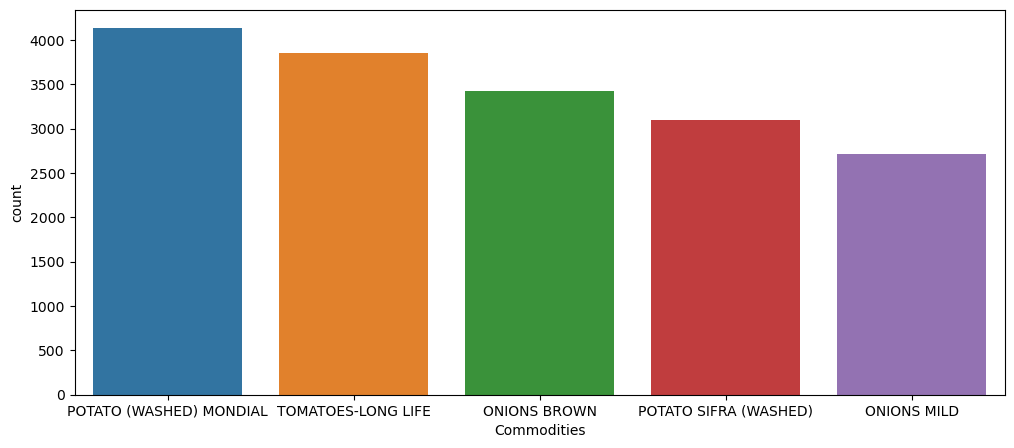

In [88]:
plt.figure(figsize=(12,5))
sns.countplot(data=com, x='Commodities', order=com['Commodities'].value_counts().index[:5])


In [89]:
com.columns


Index(['Province', 'Container', 'Size_Grade', 'Weight_Kg', 'Commodities',
       'Date', 'Low_Price', 'High_Price', 'Sales_Total', 'Total_Qty_Sold',
       'Total_Kg_Sold', 'Stock_On_Hand', 'avg_price_per_kg', 'year', 'month',
       'day', 'selling_price'],
      dtype='object')

In [90]:
# sns.pairplot(com)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


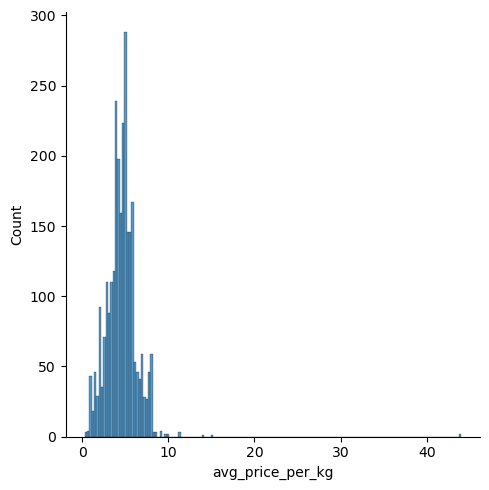

In [91]:
sns.displot(onion['avg_price_per_kg'])

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
from sklearn import preprocessing

In [94]:
from sklearn.preprocessing import LabelEncoder

In [95]:
label_encoder=preprocessing.LabelEncoder()

In [96]:
com.head(5)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,year,month,day,selling_price
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020/03/10,108.0,112.0,3236.0,29.0,348.0,0.0,9.30,2020.0,3.0,10.0,111.59
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020/09/09,150.0,170.0,51710.0,332.0,6075.6,822.0,8.51,2020.0,9.0,9.0,155.75
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020/05/05,70.0,80.0,4860.0,66.0,1320.0,50.0,3.68,2020.0,5.0,5.0,73.64
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020/01/20,60.0,60.0,600.0,10.0,90.0,0.0,6.67,2020.0,1.0,20.0,60.00
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020/07/14,40.0,45.0,41530.0,927.0,9270.0,393.0,4.48,2020.0,7.0,14.0,44.80


In [97]:
onion['Province']=label_encoder.fit_transform(onion['Province'])
onion['Container']=label_encoder.fit_transform(onion['Container'])
onion['Size_Grade']=label_encoder.fit_transform(onion['Size_Grade'])
onion['Commodities']=label_encoder.fit_transform(onion['Commodities'])
onion['Date']=label_encoder.fit_transform(onion['Date'])
onion

/var/folders/59/nzz8v2013tsby595_yj460fr0000gn/T/ipykernel_77070/630594990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onion['Province']=label_encoder.fit_transform(onion['Province'])
/var/folders/59/nzz8v2013tsby595_yj460fr0000gn/T/ipykernel_77070/630594990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onion['Container']=label_encoder.fit_transform(onion['Container'])
/var/folders/59/nzz8v2013tsby595_yj460fr0000gn/T/ipykernel_77070/630594990.py:3: SettingWithCopyWarning: 
A value is trying to

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg,year,month,day,selling_price
41,6,4,1,10.0,0,144,30.0,58.0,117927.0,2560.0,25600.0,7639.0,4.61,2020.0,10.0,3.0,46.07
56,6,5,1,20.0,0,123,192.0,192.0,8800.0,10.0,200.0,135.0,44.00,2020.0,8.0,14.0,880.00
87,1,4,7,10.0,0,22,10.0,15.0,95.0,9.0,90.0,61.0,1.06,2020.0,2.0,3.0,10.56
112,6,4,3,10.0,0,133,25.0,40.0,38300.0,1326.0,13260.0,736.0,2.89,2020.0,9.0,2.0,28.88
146,3,4,0,10.0,0,10,54.0,62.0,16214.0,281.0,2810.0,1665.0,5.77,2020.0,1.0,10.0,57.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64319,3,3,1,7.0,0,19,28.0,35.0,97840.0,3353.0,23471.0,3278.0,4.17,2020.0,1.0,28.0,29.18
64330,2,4,1,10.0,0,87,50.0,50.0,200.0,4.0,40.0,0.0,5.00,2020.0,6.0,17.0,50.00
64354,6,4,3,10.0,0,78,58.0,58.0,6380.0,110.0,1100.0,309.0,5.80,2020.0,5.0,27.0,58.00
64357,3,3,5,7.0,0,50,30.0,30.0,3900.0,130.0,910.0,550.0,4.29,2020.0,3.0,30.0,30.00


In [98]:
x=onion[['Province','Container','Size_Grade','Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand']].astype(int)

In [99]:
y = onion[['avg_price_per_kg']].astype(int)

FEATURE SELECTION
1.Correlation heatmap

In [100]:
data=onion[['Container','Weight_Kg','High_Price','Total_Qty_Sold','Stock_On_Hand','selling_price','avg_price_per_kg']]

<Axes: >

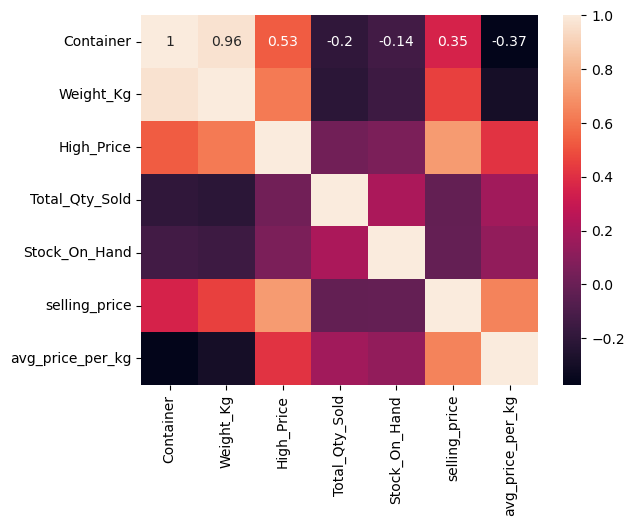

In [101]:
sns.heatmap(data.corr(),annot=True)

In [102]:
from sklearn.feature_selection import mutual_info_classif

In [103]:
%matplotlib inline

information gain(this is for classification)

In [104]:
# importance=mutual_info_classif(x,y.astype(int))
# feat=pd.Series(importance,x.columns[x[0:10]])
# feat.plot(kind='bar')
# plt.show()

In [105]:
from  sklearn.feature_selection import SelectKBest

In [106]:
from sklearn.feature_selection import chi2

chi square

In [107]:
xx=x[['Province','Container','Size_Grade']]

In [108]:
chi_feature=SelectKBest(chi2,k=3)
x_kbest=chi_feature.fit_transform(xx,y)
print("Original feature:" ,xx.shape[1])
print("Reduced feature number:",x_kbest.shape[1])
filter = chi_feature.get_support()
filter

Original feature: 3
Reduced feature number: 3


array([ True,  True,  True])

VARIANCE THRESHOLD

In [109]:
from sklearn.feature_selection import VarianceThreshold

In [110]:
xxx=onion[['Province','Container','Size_Grade','Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand']]

In [111]:
v_threshold=VarianceThreshold(threshold=1)
v_threshold.fit(xxx)
v_threshold.get_support()

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True])

BACKWARD ELIMINATION(most precise mpodel)

In [112]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [113]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [114]:
ffs = SequentialFeatureSelector(lr, k_features='best', forward=True, n_jobs=-1)

ffs.fit(xxx,y)

SequentialFeatureSelector(estimator=LinearRegression(), k_features=(1, 10),
                          n_jobs=-1, scoring='r2')

In [115]:
feature=list(ffs.k_feature_names_)
feature



['Province',
 'Container',
 'Weight_Kg',
 'Low_Price',
 'High_Price',
 'Sales_Total',
 'Total_Qty_Sold',
 'Total_Kg_Sold']

In [116]:
com[['Province',
 'Container',
 'Size_Grade',
 'Weight_Kg',
 'Low_Price',
 'High_Price',
 'Sales_Total',
 'Total_Kg_Sold',
 'Stock_On_Hand']]

,Province,Container,Size_Grade,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Kg_Sold,Stock_On_Hand
0,CAPE,EC120,1L,12.0,108.0,112.0,3236.0,348.0,0.0
1,CAPE,M4183,1L,18.3,150.0,170.0,51710.0,6075.6,822.0
2,GAUTENG,AT200,1L,20.0,70.0,80.0,4860.0,1320.0,50.0
3,TRANSVAAL,BJ090,1L,9.0,60.0,60.0,600.0,90.0,0.0
4,WESTERN FREESTATE,PP100,1R,10.0,40.0,45.0,41530.0,9270.0,393.0
...,...,...,...,...,...,...,...,...,...
64371,TRANSVAAL,AG100,1M,10.0,70.0,75.0,19695.0,2810.0,3583.0
64372,IMPORTS - OUTSIDE RSA,BC180,X,18.0,160.0,220.0,13560.0,1296.0,887.0
64373,TRANSVAAL,TS035,1M,3.5,20.0,20.0,6000.0,1050.0,900.0
64374,NATAL,BJ100,2M,10.0,50.0,80.0,16730.0,2770.0,372.0


Removing outliars

In [117]:
onion=onion[(onion['avg_price_per_kg']<500) & (onion['avg_price_per_kg'] > 0)]
X=onion[['Province','Size_Grade','Weight_Kg','Sales_Total','Low_Price','High_Price','Total_Kg_Sold','Stock_On_Hand']]


In [118]:
y = onion[['avg_price_per_kg']]
y

,avg_price_per_kg
41,4.61
56,44.00
87,1.06
112,2.89
146,5.77
...,...
64319,4.17
64330,5.00
64354,5.80
64357,4.29


Scaling the feature to ensure that they have the same scale. This is for ensuring improve the model perfomance

In [119]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_normalize = pd.DataFrame(X_scaled, columns=X.columns)

Slpiting and fitting the Random Forest model

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X_normalize, y, test_size=0.2, random_state=42)

In [122]:
from sklearn.ensemble import RandomForestRegressor
lm=RandomForestRegressor(max_depth=10)



In [123]:
lm.fit(X_train, y_train)

/var/folders/59/nzz8v2013tsby595_yj460fr0000gn/T/ipykernel_77070/2051686732.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  lm.fit(X_train, y_train)


RandomForestRegressor(max_depth=10)

Predicting the model

In [124]:
y_pred = lm.predict(X_test)
y_pred

array([ 2.94516847,  4.9465383 ,  3.3667714 ,  4.29361358,  4.01078389,
        3.5027494 ,  7.70689433,  8.32582576,  4.86567048,  3.10943746,
        4.00151852,  7.7787219 ,  5.73910669,  6.36474502,  6.5462    ,
        6.30469932,  1.07166392,  5.7712814 ,  5.97317574,  4.00151852,
        1.48495454,  1.99096387,  6.47142561,  5.45535118,  3.65119476,
        4.11584937,  4.85135191,  4.01930167,  3.44417048,  5.27785955,
        5.46174019,  4.50220378,  5.17421754,  4.96015074,  3.83568201,
        4.01187301,  4.05129817,  2.96505573,  4.84008333,  3.64085498,
        1.50421661,  3.44403954,  5.75480212,  2.64100881,  1.00221806,
        1.42876393,  4.62692759,  3.72602468,  5.40290735,  2.07798476,
        5.09895493,  6.01476371,  2.03501525,  1.05382956,  3.64507721,
        4.01947419,  3.25320079,  2.99698155,  8.40664958,  6.2361558 ,
        5.45109404,  6.6556223 ,  7.77979629,  7.79436336,  4.79634208,
        5.55418609,  2.51673396,  3.89034561,  7.554925  ,  4.79

Checked the max and min to remove the outliars

In [125]:
y_test.max()

avg_price_per_kg    9.0
dtype: float64

Visualising the predicted values and the actual values

Text(0.5, 0, 'Actual Values')

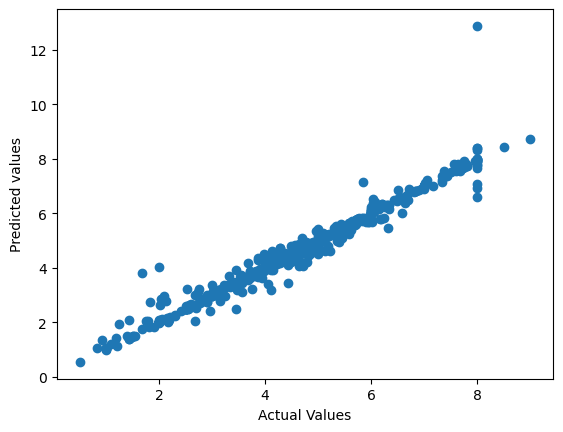

In [126]:
plt.scatter(x=y_test,y=y_pred)
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')

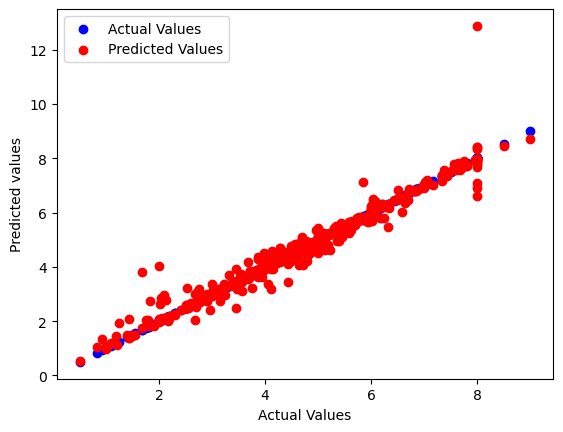

In [127]:
plt.scatter(y_test, y_test, color='blue', label='Actual Values')

# Plot y_pred
plt.scatter(y_test, y_pred, color='red', label='Predicted Values')
plt.ylabel('Predicted values')
plt.xlabel('Actual Values')
plt.legend()

Checking the accuracy of the model

In [128]:
# rsquared = lm.score(X_test, y_test)
# rsquared
from sklearn.metrics import r2_score 
r2 = r2_score(y_test, y_pred)
r2

0.9605848239700329

Checking the errors

In [129]:
from sklearn.metrics import mean_squared_error

In [130]:
b = mean_squared_error(y_test, y_pred, squared=False)
print(b)

0.3356824461099433


In [131]:
residuals = y_test - y_pred
sns.displot(residuals, kde=True, bins=20)  

ValueError: Unable to coerce to Series, length must be 1: given 543

In [ ]:
rf, dt, lr regression

rf, dt, lr classification

